In [1]:
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
%matplotlib inline

# Unsupervised Learning: K-means clustering

**Unsupervised learning** learning from data when we do not have (or do not use) labels. It's used to find patterns in data, and learn about the system we're studying. 

There are many different types of unspervised algorithms, we're going to investigate one of the standard **clustering** algorithms which is used to identify clusters in data. 

Unsupervised learning is used to find and group together related data. It allows machines to learn in an un-supervised way, although, often we test out unsupervised learning algorithms on datasets which do have labels, and we don't give the algorithm the labels until the end to see if the algorithm gets it correct.

Some data and Code adapted from Mubaris at 
https://github.com/mubaris/friendly-fortnight/blob/master/kmeans-from-scratch-and-sklearn.py

First, we'll import all the libraries we need for this tutorial.

In [2]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# import the method KMeans from sklearr
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#plt.rcParams['figure.figsize'] = (16, 9)

This is a little function to make the plots later.

In [3]:
def kmeans_plotter(clusters, k):
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'lightcoral', 'darkorange', 'purple', 'darkcyan']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
    ax.cla

Use pandas (pd) to import some data.

In [4]:
# Importing the dataset
data = pd.read_csv('./friendly-fortnight-master/xclara.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


The first step is to have a look at the data. 

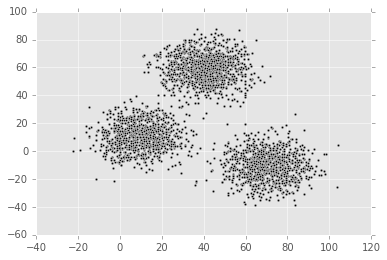

In [5]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

Human beings are great. I bet that you all agree with me that there are 3 clusters in that data, and you'd all draw circles around them in around the same place. 

How do you know which points belong to which cluster? Think of how you would define to a machine how to put the points together, it's hard isn't it? 

Clustering data is quite a hard problem for a computer to do. 

In this example, we're going to try and get a machine to cluster the data for us. 

This defines the distance between 2 points, we will be using this later, for now, don't worry about it. (Although if you are interested, this is a function to calculate the distance between two points (a and b)).  

In [6]:
# Euclidean Distance Calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

We're going to start off with k=2. Why? This data is 2-dimensional and easy to plot and see by eye that there are 3 clusters, but our data is usually of a much higher dimension and it is not always obvious what k should be. 

## Using K-means

We're going to use k-means to cluster the data we input, and try out several values of k. 

**start from here if you're re-running the k-means code**

In [7]:
# Number of clusters -
k = 2

This sets two initial starting points, called *centroids* (as we hope the centroids will end up at the centre of the clusters). We pick them randomly, noticed that if you run the code below a few times that you get different positions. `C_x` and `C_y` are the x and y positions of the centroids as a list, we then create `C` which is column of the centroids position in space.

In [8]:
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print("x \t y")
print(C)

Initial Centroids
x 	 y
[[ 48.  65.]
 [ 71.  33.]]


This plots the data with the initial guesses for the centroid.

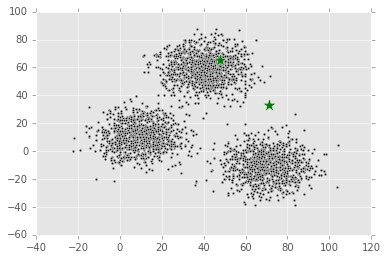

In [9]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

We update the positions of the centroids each step.  `clusters` is a matrix of which cluster a point belongs to. 

In [10]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
print("starting error is {}".format(error))

starting error is 112.51222155837117


The codeblock below will loop until the error is zero and should print out the error each step and then print out all the intermediate positions of the centroids. 

*If the code just sits there on 0 error when you're rerunning this code, that means you've not re-initialized the starting centroids, go back and do that!*

Fitting error is: 48.04697036743164
Fitting error is: 1.962653636932373
Fitting error is: 1.1019736528396606
Fitting error is: 1.962515115737915
Fitting error is: 3.0041263103485107
Fitting error is: 5.069579124450684
Fitting error is: 6.675317764282227
Fitting error is: 4.425119876861572
Fitting error is: 0.8068836331367493
Fitting error is: 0.062410060316324234
Fitting error is: 0.0


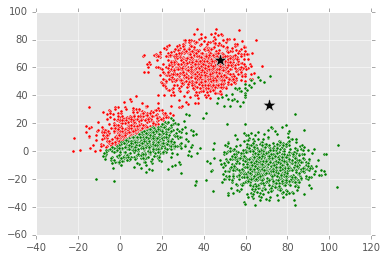

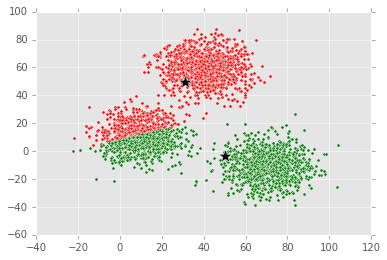

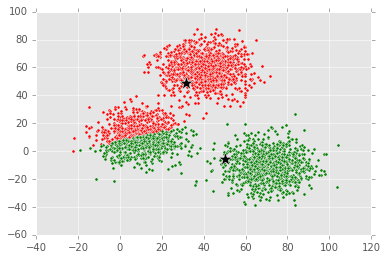

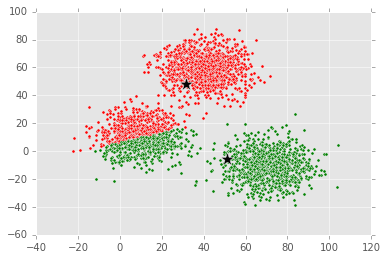

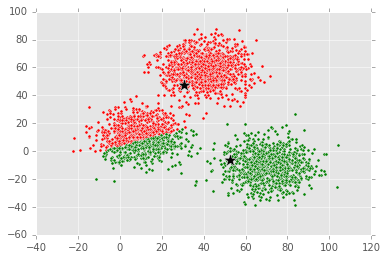

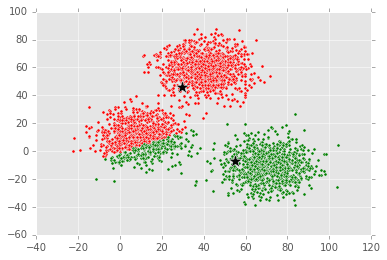

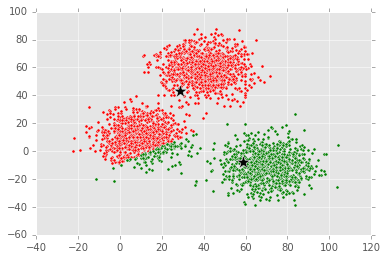

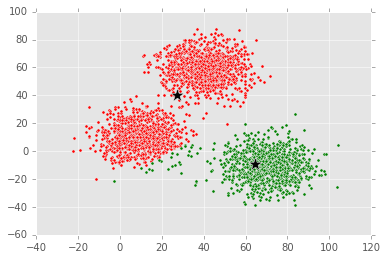

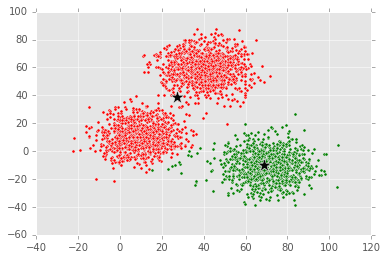

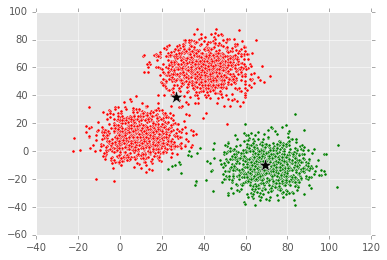

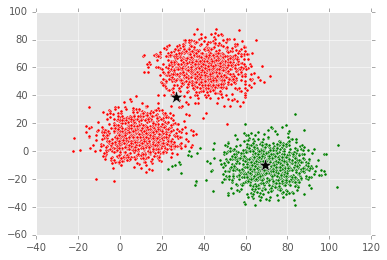

In [11]:
# Loop will run till the error becomes zero
error_list = [error]
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    kmeans_plotter(clusters=clusters, k=k)
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    print("Fitting error is: {}".format(error))
    error_list.append(error)

This code produces a plot of the fitting error over time: 

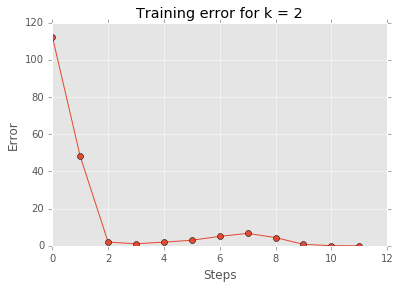

In [12]:
plt.plot(error_list, marker='o')
plt.xlabel('Steps')
plt.ylabel('Error')
plt.title('Training error for k = ' + str(k))

This plots the final state of the k-means cluster allocation. 

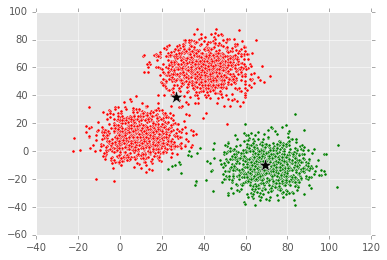

In [13]:
kmeans_plotter(clusters=clusters, k=k)

Now how do we find which value of k is best?

As it happens, KMeans is such a standard technique it is built in to sklearn, and instead of running the code by hand, we can just use the sklearn version, like this.

This line instantiates a KMeans object we're calling kmeans. We're giving it two **parameters**, `n_clusters` and `verbose`. The arameter `n_clusters` is the number of clusters to fit, and we tell it to use `k` as the number of clusters. N.B. `k` was assigned above. `verbose` is a setting to the program, verbose=True tells it to print out everything its doing to the screen (i.e. be verbose). 

In [14]:
# Number of clusters
kmeans = KMeans(n_clusters=k,verbose=True)
print('Using k of {}'.format(k))

Using k of 2


We now put the data `X` into kmeans and call the `.fit()` function on it. We overwrite the kmeans object with this new object that has been fitted. Note that this is equivalent to the code above which ran a certain number of times and printed out the error at each step

In [15]:
# Fitting the input data
kmeans=kmeans.fit(X)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2335585.02229
start iteration
done sorting
end inner loop
Iteration 1, inertia 2310864.71985
start iteration
done sorting
end inner loop
Iteration 2, inertia 2309985.38917
start iteration
done sorting
end inner loop
Iteration 3, inertia 2309985.38917
center shift 0.000000e+00 within tolerance 8.384055e-02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2573185.1623
start iteration
done sorting
end inner loop
Iteration 1, inertia 2567529.83193
start iteration
done sorting
end inner loop
Iteration 2, inertia 2567009.17125
start iteration
done sorting
end inner loop
Iteration 3, inertia 2565668.05201
start iteration
done sorting
end inner loop
Iteration 4, inertia 2562074.2717
start iteration
done sorting
end inner loop
Iteration 5, inertia 2554370.40222
start iteration
done sorting
end inner loop
Iteration 6, inertia 2536989.7642
start iteration
done sorting
e

This line does `.predict()` on `X` and assigns labels to each point, these labels are the numbers of which cluster a point is in. 

In [16]:
# Getting the cluster labels
labels = kmeans.predict(X)

For example, see which cluster points 0, 500, 1000, 1500, 2000, 2500 are 3000 are in is in with this code:

In [17]:
# example of finding the labels for point 0, 1 and 2
kmeans.predict(X[0:3000:500])

array([1, 1, 1, 1, 1, 0])

This gets the final centroid values

In [18]:
# Centroid values
centroids = kmeans.cluster_centers_

Here we compare the centroids we found above with those found from the inbuilt method.

In [19]:
# Comparing with scikit-learn centroids
print("Centroid values")
print("Scratch")
print(C) # From Scratch
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
Scratch
[[ 26.97904778  38.42510223]
 [ 69.49144745 -10.10803699]]
sklearn
[[ 69.49144971 -10.10803707]
 [ 26.97904841  38.42510047]]


To evaulate the k-means clusters, we calculate the sum of squared error (SSE). 
For each point, get the distance between a point x and the centroid of the cluster, then square that distance and sum for all points. 
$$
SSE = \sum_{i=1}^{k} \sum_{x \in C_i} (dist(i, centroid_c))^2
$$
We could simply sum the distances, but as some will be positive and some negative they could cancel out and gives us a lower measure. So we square the errors instead. 

Yesterday, in the regression workshop we used $R^2$ values, which is the sum of squared distances between the points and the model (i.e. the best fit line). The SSE is the same thing, except here we are care about the distance to the nearest cluster.

**In the KMeans package, the SSE is given by `.inertia_`**

## Exercise 1.  
**Re-run the code above for a k of 1, 2, 3, 4, 5 and look at the clusters that are formed. Set `SSE_1` equal the kmeans.inertia when k is 1, `SSE_2` to kmeans.inertia for k is 2 and do this for each value of k.** i.e. type SSE_1=kmeans.inertia after you run k-means for k is 1. 
Then run the following code to plot the SSE for each value of k. 

In [20]:
print("k ={}".format(k))

k =2


In [21]:
# ! CHANGE THIS CODE EACH TIME YOU CHANGE K!
SSE_2=kmeans.inertia_

In [22]:
k_list=[1,2,3,4,5]
SSE_list=[SSE_1, SSE_2, SSE_3, SSE_4, SSE_5]


NameError: name 'SSE_1' is not defined

In [23]:
plt.plot(k_list,SSE_list, "-o") # this plots the data
plt.xlabel('k') # this labels teh x axis
plt.ylabel('SSE') # this labels the y axis
plt.xticks(np.arange(0, 6, step=1)); # this sets the ticks to be integers

NameError: name 'SSE_list' is not defined

You should notice in this plot that the rate of the SSE (sum of squared error) improvement drops off after **k=3**. Generally people use the **Elbow method** of determining k, i.e. you look for the *elbow of the plot*, namely, where the gradient suddenly reduces. This is the point where adding more clusters doesn't really gain you much in describing the data. 

As I said in the previous tutorials, models should be as simple as possible but no simpler. Adding more clusters complicates the model for minimal gains. 

## 2nd Example: 

In this dataset, we have 3-dimensional data with 4 clusters, run the code below to make and plot the data.

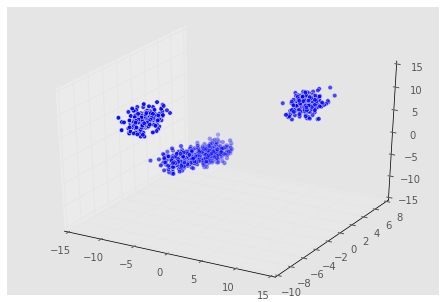

In [24]:
# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

The following code will run kmeans with k=4 and hopefully find the clusters, try it out!

In [25]:
# Initializing KMeans with 4 clusters (not verbose this time, unless you want to see it training)
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

This plots the data with the found clusters, hopefully you've got 4. 

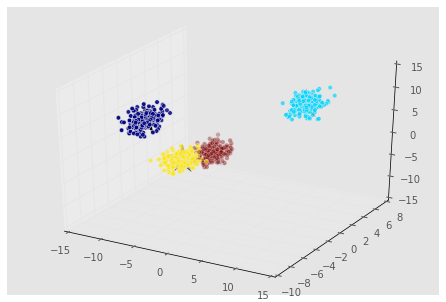

In [26]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#020202', s=1000)

This code runs k-means for values of k from 0 to 9, what value of k is best from this graph?

k is: 1, SSE is 76688.14540415508
k is: 2, SSE is 33960.89809280951
k is: 3, SSE is 6897.186676110589
k is: 4, SSE is 2408.452138105816
k is: 5, SSE is 2231.998843356125
k is: 6, SSE is 2072.047295325623
k is: 7, SSE is 1931.543283394281
k is: 8, SSE is 1828.5627353048185
k is: 9, SSE is 1693.3219907305142
k is: 10, SSE is 1596.3047722513058


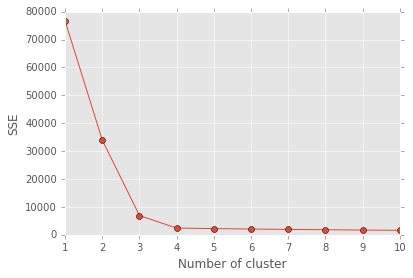

In [27]:
sse = {}
# # this loop runs over k from 1 to 10
for k in [1,2, 3,4,5,6,7,8,9,10]:
    # this line does k-means on the data (fitting it), N.B. here we set up the kmeans object and fit with it in the same line
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans = kmeans.fit(X)
    # this sets up the clusters for each point
    #X["clusters"] = kmeans.labels_
    # this assigns the SSE for each value of k
    sse[k] = kmeans.inertia_ 
    print("k is: {}, SSE is {}".format(k, sse[k]))

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),'-o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()



## Exercise 2: Do k-means on the iris dataset

![flower](https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg)

**Run the code below to load in the iris dataset, which is a set of measurements for the sepals and petals for iris flower species. And then use the Elbow method to determine how many classes there are**

In [28]:
# load the iris dataset - this is a standard datascience dataset used to practice with
from sklearn.datasets import load_iris

iris = load_iris()

In [29]:
# put the data into a dataframe called X
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
X.head()
#data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]
#print(data)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


k is 1: SSE is 5030433.09612008
k is 2: SSE is 2309985.3891687873
k is 3: SSE is 611617.7450489756
k is 4: SSE is 536187.5333634581
k is 5: SSE is 469578.6345891764
k is 6: SSE is 408292.38069150917
k is 7: SSE is 358920.23650748463
k is 8: SSE is 313157.4502946045
k is 9: SSE is 273149.35115144483


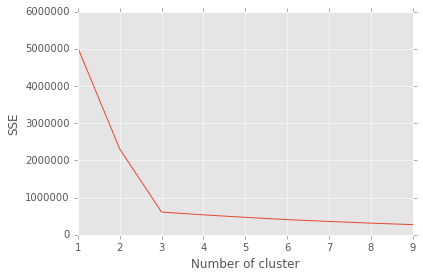

In [30]:
## answer
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print("k is {}: SSE is {}". format(k, sse[k]))
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

how many classes? 

The elbow of a graph can be difficult to determine, so people often use other metrics, like the *gap statistic* or the *silhouette method*. 

# k-means, with PCA, on the wine dataset

![wine](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Red_and_white_wine_12-2015.jpg/800px-Red_and_white_wine_12-2015.jpg)


The data set that we are going to analyze in this post is a result of a chemical analysis of wines grown in a particular region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The attributes are: Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, and Proline. 

Reference for this data: 
Forina, M. et al, PARVUS -
An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.

First, we'll import the wine and put it in a dataframe called `wine_df`.

In [31]:
wine_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline']
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = wine_names) 
wine_df = pd.DataFrame(wine_data)

In [32]:
# lets have a look at the data
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Notice that the first column is the code for the class (i.e. which vinyard it came from), the rest is analytical data from the lab. Let's try plotting some boxplots of this data.

C:\Users\ella.xenon\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


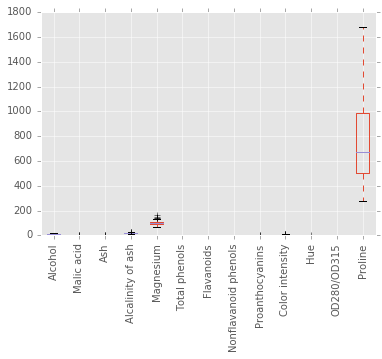

In [33]:
wine_df.boxplot(column=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline'], rot=90);

C:\Users\ella.xenon\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


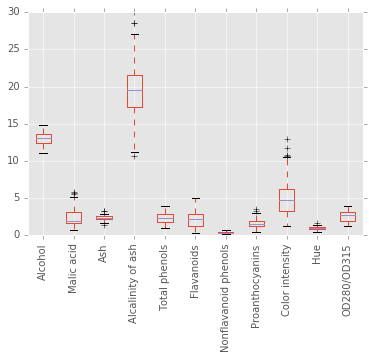

In [34]:
wine_df.boxplot(column=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Total phenols', \
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315'],
               rot=90);

In unspervised learning, the machine learning algorithm looks for clusters in the data, and learns without any labels. Although, often we do have the labels and we want to learn if the clusters in the data are associated with the labels or not. In this dataset, we have data from 13-dimensional data from vinyards and we want to know if we could identify which bottle of wine came from which vinyard, merely from its screening results. 

As we actually do have the labels however, we can plot the data with the correct labels, as in the picture below (the 'Class' column of the dataframe identifies which vinyard the wine was from). 

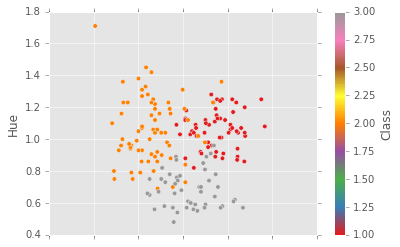

In [38]:
wine_df.plot.scatter(x = 'Alcohol', y = 'Hue', c= 'Class', colormap='Set1')

So, in the hue-alcohol dimension there is definitely 3 overlapping clusters, however overall there is no correlation between the colour of the wine and the alcohol content.

### Exercise: 
What is the relationship between flavinoids and total_phenols (find out by plotting a scatter plot). Why? 

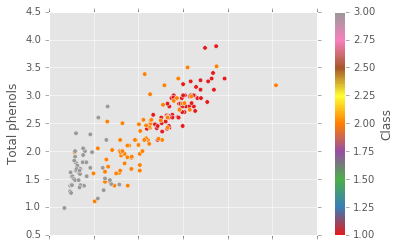

In [39]:
wine_df.plot.scatter(x = 'Flavanoids', y = 'Total phenols', c= 'Class', colormap='Set1')

Lets do a KMeans of 3 clusters on Alcohol-Hue data dimensions, and see how it does.

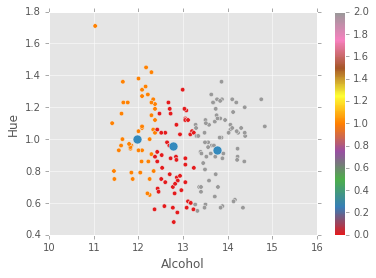

In [41]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(wine_df.iloc[:,[11,1]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(wine_df.iloc[:,[11,1]].columns.values))
fig, ax = plt.subplots(1, 1)
wine_df.plot.scatter(x = 'Alcohol', y = 'Hue', c= kmeans.labels_, colormap='Set1', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Alcohol', y = 'Hue', ax = ax,  s = 80, mark_right=False)

If you compare the two alcohol-hue graphs, you'll se ethat although they have 3 clusters, they're not the same. Kmeans is not capable of finding overlapping clusters, so we need to describe our data in a new coordinate set where the clusters might be separated, this is where PCA can help. 

Furthermore, we've oply looked at 2 of the 13-dimensional data, is there a good way to plot 13-dimensional data?

## PCA

PCA is a co-ordinate transform to **generalised coordinates** based on the **variance** in the data, this allows us to re-express the data in the new generalised coordinates, and as these try to include as much variance as possible in each coordinate, we can get an overview of the entire dataset from only plotting the data in 2-dimensional space. This allows us to visualise a high-dimensional dataset on a 2-d graph. 

In this technique, the new coordinates are called **principal components** and we're doing **principal coordinate analysis**. You can think of the principal components as the **vibrations of the dataset** and we're doing something not unlike spectroscopy to map the data.

First, we make a new dataframe of just the analytical data (i.e. removing the class column). 

In [42]:
df=wine_df.iloc[:,1:]

Generally in machine learning we **standardize** the data, we do this to remove the effects of the different scales of the features in the 'real world' which can swamp the effects of the variance of the features in the dataset, and to make learning easier. It's also the first step in doing a PCA. 

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(wine_df)

Now, create a PCA instance, with 13 components, as the data has 13 features.

In [44]:
# Create a PCA instance: pca
pca = PCA(n_components=13)

Now, we do the PCA, by doing what is called a `fit_transform` on the standardized dataset, and the output is the principal components. 

I'm skipping over a lot of mathematics here as we're just focussing on using the technique. What we are doing is a coordinate transform of the data towards 'generalised' coordinates based on the variance in the dataset. This is done by doing a matrix diagonalisation of the standaradized data matrix. 

In [45]:
# do the PCA on the x_std matrix, and save the outputs as principalComponents
principalComponents = pca.fit_transform(X_std)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Now, lets plot the amount of variance explained by each principal component. Note that the output principal components are orderd by the amount of variance they explain. 

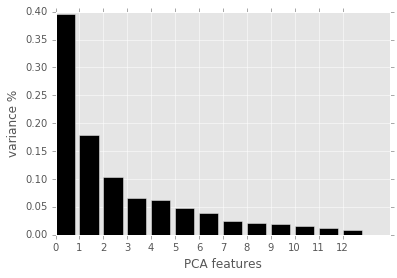

In [46]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

*What was the point of this coordinate transform?*

Now that we have transformed the data into 13 new coordinates we could express the data in terms of these and we would get back exactly the same data. What is often done is to throw away the principal coordinates which only explain small amounts of the variance. 

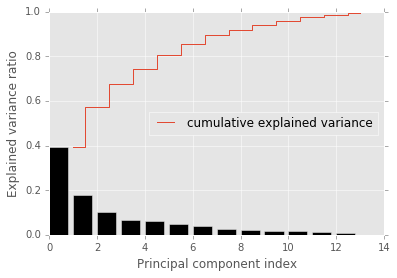

In [47]:
# calculate cumulative sum of explained variances
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Notice from the graph you've just made, that if we only used the first 5 principal coordinates it explains 80% of the variance in the data, so we could **coarse-grain** the system and just use a 5-dimensional **approximation** to the data instead of the full 13-dimensional one. This is often done as a **pre-processing** step in machine learning and it is called **dimensional reduction** (as you've reduced the number of dimensions in the problem). 

What's we're going now is visualist the dataset in the first 2 principal components, which together explain just under 60\% of the variance in the data, and we're going to see if there are any clusters there: 

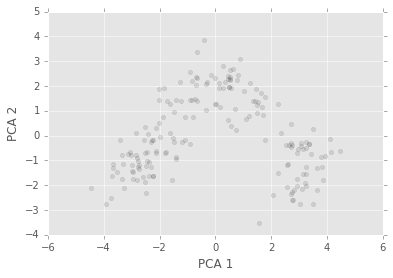

In [48]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

So, we've plotted the first a second components against each other. Before, we tried plotting Alcohol against Hue, which was 2 out of the 13 analytes, then we tried plotting flavinoids against total phenols, which was a separate 2 out of the 13 analytes, and neither of these had separated clusters for the 3 different vinyards. Here, we're using the new coordinates PCA_1 and PCA_2 as a coordinates to describe our data with, and have plotted them the exact same way as we did for alcohol and hue earlier. These are only 2 out of the 13 pricipal components, but they have **transformed** the wine data, and happily, it looks like there might be 3 clusters in that data. 

Now, let's ignore the rest of the data and do a 1-dimensional k-means on just the first 2 PCA coordinates to find out if k-means finds some clusters here. Remember from the graph above, the first 1 components explain around 40\% of the data

In [49]:
PCA_components.iloc[:,:1].head()

,0
0,-3.522934
1,-2.528858
2,-2.785029
3,-3.922588
4,-1.407511


*Aside on python slices* To get a column out of the PCA table, use something like: `PCA_components.iloc[:,:1]`. That code will grab all the columns **up to** 1, which is column 0. 

`PCA_components.iloc[:,:2]` will get you columns 0 and 1
`PCA_components.iloc[:,:3]` will get you columns 0, 1, 2. 

To get all columns use: `PCA_components.iloc[:,:]` 

To get a single column, say column number 2, use the number without the colon `PCA_components.iloc[:,[2]]`. 

Use the box above to test these out.

### Results from a k-means using 3 clusters on the first PCA vector

So, using only 1-dimensional data after PCA, we have managed to get the data into 3 rough clusters that seem to fit the clusters roughly visible by eye

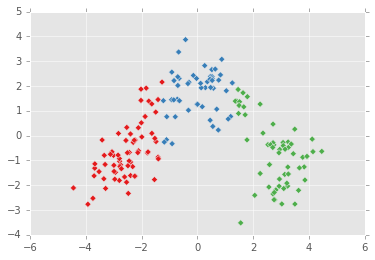

In [50]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(PCA_components.iloc[:,:1])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(PCA_components.iloc[:,:1].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(PCA_components.iloc[:,:1])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

### Exercise: What happens if we add more of the PCA components?

Try doing a kmeans on all the PCA components, the first 2 components and the first 3 components. What is the effect of adding in the extra components? 

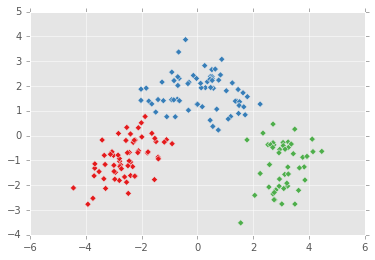

In [51]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(PCA_components.iloc[:,:2])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(PCA_components.iloc[:,:2].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(PCA_components.iloc[:,:2])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

In [ ]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(PCA_components.iloc[:,:3])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(PCA_components.iloc[:,:3].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(PCA_components.iloc[:,:3])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

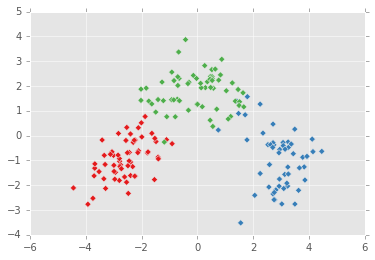

In [52]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(PCA_components.iloc[:,:])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(PCA_components.iloc[:,:].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(PCA_components.iloc[:,:])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

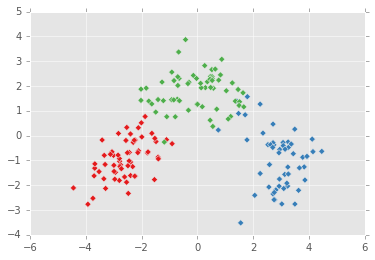

In [53]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(PCA_components.iloc[:,:])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(PCA_components.iloc[:,:].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(PCA_components.iloc[:,:])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

#### Comparison to the actual labels (ground truth)

This is the actual labels for the data, note that the clusters from the first PCA k-means matched it pretty well.

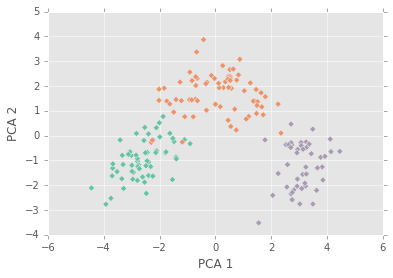

In [54]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=wine_df['Class'], cmap='Set2', marker='D', vmax=9)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## Exercise: 
We do not always preprocess the data using PCA, sometimes the machine learning is done on the original data and PCA is only used for plotting. 

Pick your favourite 1 analyte foom the original data and do a PCA with that data and plot it on a principal component graph above. Compare it to the the ground truth and and the results from using the first PCA coordinate. Which looks closer to the ground truth? 

Repeat with a set of 2 analytes and then with all the analytes.

In [55]:
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


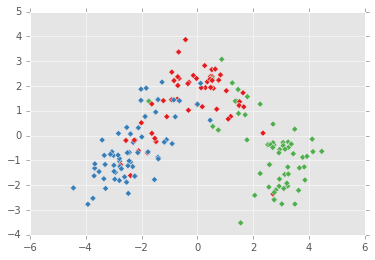

In [56]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(wine_df.iloc[:,[7]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(wine_df.iloc[:,[7]].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(wine_df.iloc[:,[7]])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

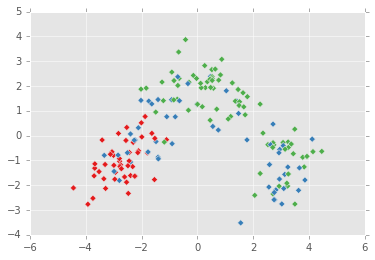

In [57]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(wine_df.iloc[:,:])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(wine_df.iloc[:,:].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(wine_df.iloc[:,:])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

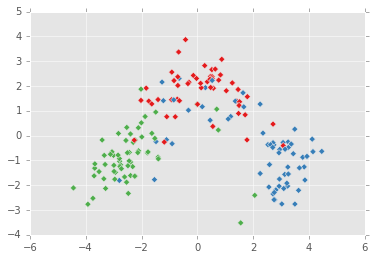

In [60]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(wine_df.iloc[:,:3])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(wine_df.iloc[:,:3].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(wine_df.iloc[:,:3])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

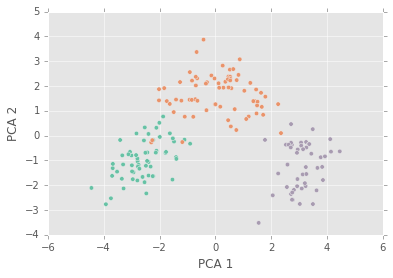

In [61]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=wine_df['Class'], cmap='Set2', marker='o', vmax=9)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
#wine_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315', c= 'Class', figsize=(12,8), colormap='jet')

## Conclusion

**Unsupervised learning** techniques look for clusters in the data. 

**Principal component analysis** is an unsupervised technique based on the variance in the data, which can be used for:
 * data analysis
 * preprocessing data (before its fed into an ML algorithm)
 * visualising high-dimensional data

**k-means** is an unsupervised **clustering** algorithm that can find clusters in data. It works best when the clusters are spherical and the same size and density as one another.

In this tutorial we have performed k means clustering on several datasets, and use PCA as a pre-processing step to k-means, which works well, and as a visualisation technique. 

Note that, the algorithms do not actually ever get the labels, so it is possible that they will not cluster according to the label. 
 

End

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300
# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()